In [2]:
# importing the libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from scipy.stats import zscore

In [3]:
#Reading the csv file
benin_malanville_df = pd.read_csv("C:\\Users\\esk\\Desktop\\data\\data\\benin-malanville.csv")

Getting to know the dataset. checking for null values in columns, looking at the shape, head and tail of the dataset,

In [4]:

#Quick look at the dataset to have an idea of the shape, columns and null values of the dataset
benin_malanville_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [5]:
#The first 5 entries of the dataset
benin_malanville_df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [6]:
#The last 5 entries of the dataset
benin_malanville_df.tail()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525595,2022-08-08 23:56,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN
525596,2022-08-08 23:57,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN
525597,2022-08-08 23:58,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN
525598,2022-08-08 23:59,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN
525599,2022-08-09 00:00,-5.5,-0.1,-5.7,0.0,0.0,23.1,98.3,1.2,1.6,0.3,124.1,5.9,996,0,0.0,23.5,22.9,NaN


Dropping the comment column from the  dataset since it has no value for us

In [7]:
benin_malanville_df.drop('Comments', axis=1, inplace=True)

Changing the types of the "Timestamp" and "Cleaning" columns

In [8]:
benin_malanville_df['Timestamp'] = pd.to_datetime(benin_malanville_df['Timestamp'])
benin_malanville_df['Cleaning'] = benin_malanville_df['Cleaning'].astype('category')

Exploring the  dataset distribution

In [9]:
benin_malanville_df.iloc[:,1:4].describe()

,GHI,DNI,DHI
count,525600.000000,525600.000000,525600.000000
mean,240.559452,167.187516,115.358961
std,331.131327,261.710501,158.691074
min,-12.900000,-7.800000,-12.600000
25%,-2.000000,-0.500000,-2.100000
50%,1.800000,-0.100000,1.600000
75%,483.400000,314.200000,216.300000
max,1413.000000,952.300000,759.200000


In [9]:
benin_malanville_df.loc[:,['ModA','ModB','TModA','TModB']].describe()

,ModA,ModB,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000
mean,236.589496,228.883576,35.246026,32.471736
std,326.894859,316.536515,14.807258,12.348743
min,0.000000,0.000000,9.000000,8.100000
25%,0.000000,0.000000,24.200000,23.600000
50%,4.500000,4.300000,30.000000,28.900000
75%,463.700000,447.900000,46.900000,41.500000
max,1342.300000,1342.300000,81.000000,72.500000


In [10]:
benin_malanville_df.loc[:,['Tamb','RH','WS','WSgust','WSstdev','WD','WDstdev','BP']].describe()

,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199
std,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993
min,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000
25%,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000
50%,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000
75%,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000
max,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000


In [11]:
benin_malanville_df.loc[:,['Precipitation']].describe()

,Precipitation
count,525600.000000
mean,0.001905
std,0.037115
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2.500000


Checking the data quality, looking for nagative values and outliers in each column

In [12]:
#Checking negative values in each column
columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
           'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Precipitation','TModA', 'TModB']
for column in columns:
    print(f"{column} {benin_malanville_df[benin_malanville_df[column]<0][column].shape}")

GHI (258847,)
DNI (275987,)
DHI (259182,)
ModA (0,)
ModB (0,)
Tamb (0,)
RH (0,)
WS (0,)
WSgust (0,)
WSstdev (0,)
WD (0,)
WDstdev (0,)
BP (0,)
Precipitation (0,)
TModA (0,)
TModB (0,)


In [13]:
#Calculating what percentage of the total data has invalid value for "GHI", "DNI" and "DHI" columns 
# in order to figure out the suitable treatment
print((258847/525600)*100)
print((275987/525600)*100)
print((259182/525600)*100)

49.247907153729074
52.50894216133942
49.31164383561644


In [14]:
#Replace negative values in each column with numpy NAN
for column_index in [1,2,3]:
    if column_index == 1:
        index_ = benin_malanville_df[benin_malanville_df['GHI']<0]['GHI'].index.values.tolist()
        for j in index_:
            benin_malanville_df.iat[j, 1] = np.NAN
    elif column_index == 2:
        index_ = benin_malanville_df[benin_malanville_df['DNI']<0]['DNI'].index.values.tolist()
        for j in index_:
            benin_malanville_df.iat[j, 2] = np.NAN
    elif column_index == 3:
        index_ = benin_malanville_df[benin_malanville_df['DHI']<0]['DHI'].index.values.tolist()
        for j in index_:
            benin_malanville_df.iat[j, 3] = np.NAN

In [15]:
#Checking if the replacement goes well by counting null values
benin_malanville_df.isnull().sum()

Timestamp             0
GHI              258847
DNI              275987
DHI              259182
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
dtype: int64

Because the invalid entries for those 3 columns accounts for almost half of the dataset row below I decided to get rid of them rather than imputing 

In [16]:
benin_malanville_df.dropna(how="any")

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
413,2021-08-09 06:54:00,16.7,0.0,16.5,16.1,16.3,24.2,98.8,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.2,23.7
414,2021-08-09 06:55:00,18.2,0.1,18.0,17.4,17.6,24.2,98.8,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.3,23.8
415,2021-08-09 06:56:00,19.7,0.3,19.5,18.7,18.9,24.2,98.8,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.3,23.9
416,2021-08-09 06:57:00,21.1,0.6,20.9,19.9,20.1,24.2,98.9,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.4,23.9
417,2021-08-09 06:58:00,22.5,1.1,22.2,21.1,21.3,24.2,98.9,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.5,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525158,2022-08-08 16:39:00,4.9,0.0,5.0,5.9,5.8,22.1,99.2,5.2,6.4,0.7,153.4,8.9,995,0,0.0,22.8,22.1
525160,2022-08-08 16:41:00,4.8,0.0,4.9,5.8,5.7,22.1,99.2,5.6,7.2,0.9,153.1,9.4,994,0,0.0,22.8,22.1
525166,2022-08-08 16:47:00,4.7,0.1,4.7,5.7,5.5,22.2,99.2,5.2,5.9,0.5,147.7,9.0,994,0,0.0,22.9,22.2
525167,2022-08-08 16:48:00,4.7,0.0,4.8,5.6,5.5,22.2,99.3,4.7,6.2,0.7,145.4,9.8,994,0,0.0,22.9,22.2


In [17]:
#checking the distribution of those 3 columns after invalid data replaced with 'NA'
benin_malanville_df.iloc[:,1:4].describe()

,GHI,DNI,DHI
count,266753.000000,249613.000000,266418.000000
mean,476.746489,352.575567,230.808498
std,320.578541,280.657284,150.487752
min,0.000000,0.000000,0.000000
25%,176.900000,54.100000,117.900000
50%,474.200000,345.700000,213.400000
75%,771.900000,602.900000,324.200000
max,1413.000000,952.300000,759.200000


In [19]:
#IQR method outliers identification for each column
columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
           'WSgust', 'WD', 'BP', 'Precipitation','TModA', 'TModB']
for column in columns:
    Q1 = benin_malanville_df[column].quantile(0.25)
    Q3 = benin_malanville_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = benin_malanville_df[(benin_malanville_df[column] < lower_bound) | (benin_malanville_df[column] > upper_bound)]
    if outliers.shape[0] > 0:
        print(f"Outliers in {column} using IQR:\n{outliers[column].shape}\n")
        print(f"the outlier accounts to {(outliers.shape[0]/525600) * 100} percent of the data\n")

Outliers in DHI using IQR:
(1386,)

the outlier accounts to 0.2636986301369863 percent of the data

Outliers in ModA using IQR:
(98,)

the outlier accounts to 0.018645357686453576 percent of the data

Outliers in ModB using IQR:
(240,)

the outlier accounts to 0.045662100456621 percent of the data

Outliers in Tamb using IQR:
(222,)

the outlier accounts to 0.04223744292237443 percent of the data

Outliers in WS using IQR:
(6717,)

the outlier accounts to 1.2779680365296804 percent of the data

Outliers in WSgust using IQR:
(5368,)

the outlier accounts to 1.0213089802130897 percent of the data

Outliers in BP using IQR:
(10288,)

the outlier accounts to 1.9573820395738204 percent of the data

Outliers in Precipitation using IQR:
(3789,)

the outlier accounts to 0.7208904109589042 percent of the data

Outliers in TModA using IQR:
(1,)

the outlier accounts to 0.0001902587519025875 percent of the data

Outliers in TModB using IQR:
(257,)

the outlier accounts to 0.04889649923896499 perc

Calculating outlier through Z-score

In [20]:
cols = list(benin_malanville_df.columns)
cols

['Timestamp',
 'GHI',
 'DNI',
 'DHI',
 'ModA',
 'ModB',
 'Tamb',
 'RH',
 'WS',
 'WSgust',
 'WSstdev',
 'WD',
 'WDstdev',
 'BP',
 'Cleaning',
 'Precipitation',
 'TModA',
 'TModB']

In [21]:
cols.remove('Timestamp')
cols.remove('Cleaning')
cols.remove('WSstdev')
cols.remove('WDstdev')

In [22]:
z_scores = benin_malanville_df[cols].apply(zscore)

# Flag rows with Z-scores > ±3
outliers_z = (z_scores.abs() > 3).any(axis=1)
outlier_rows = benin_malanville_df[cols][outliers_z]
print("Outliers based on Z-scores:\n", outlier_rows)


Outliers based on Z-scores:
            GHI    DNI    DHI    ModA    ModB  Tamb    RH   WS  WSgust     WD  \
671     1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6  3.4     4.1  175.8   
674     1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1  4.0     4.6  169.1   
676     1334.0  751.9  620.0  1267.3  1267.3  31.1  67.0  2.7     3.6  208.0   
850     1324.0  813.0  532.3  1218.0  1217.0  31.0  62.9  2.2     3.1  225.6   
2837       NaN    NaN    NaN     0.0     0.0  26.2  88.5  5.8     6.7  235.3   
...        ...    ...    ...     ...     ...   ...   ...  ...     ...    ...   
525148     4.7    0.0    4.7     5.8     5.7  22.0  99.1  6.2     7.4  133.2   
525150     4.7    NaN    4.8     5.9     5.8  22.0  99.1  6.7     8.4  139.3   
525151     4.7    NaN    4.8     6.0     5.9  22.0  99.1  7.3     8.7  146.9   
525153     4.9    0.0    5.0     6.1     5.9  22.0  99.2  5.5     6.9  152.4   
525155     4.8    0.0    4.9     6.0     5.9  22.0  99.1  6.9     8.9  153.8   

         B

Box plot visualazation of columns with outliers based on IQR

In [23]:

cols_with_IQR_outliers = ['DHI','ModA','ModB','Tamb','WS','WSgust','BP','Precipitation','TModA','TModB']


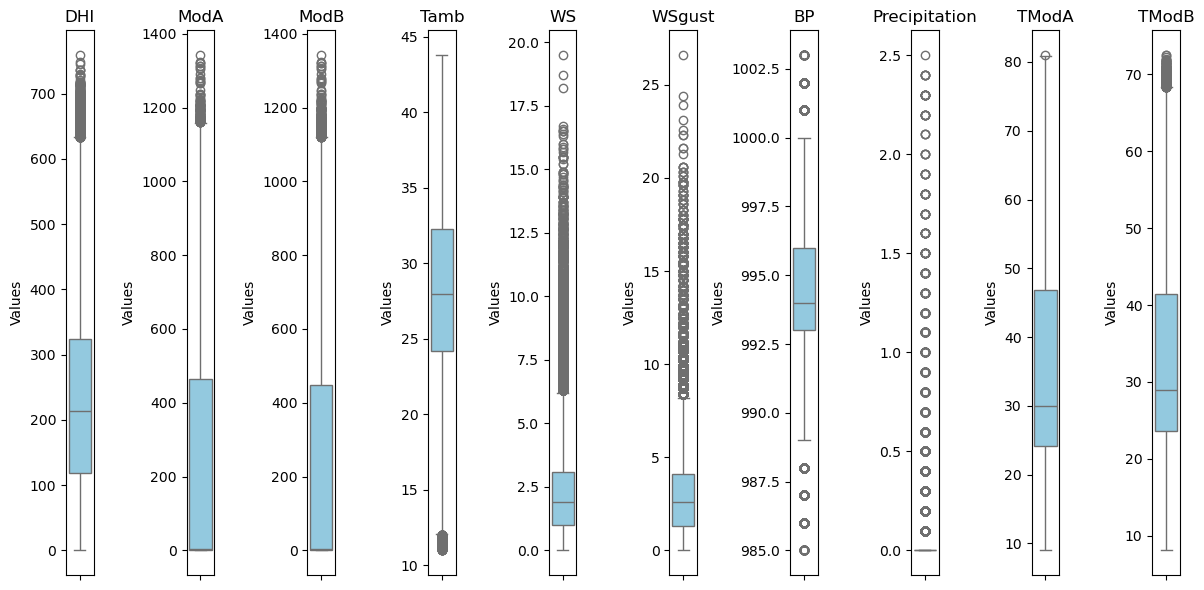

In [24]:
plt.figure(figsize=(12, 6))
for i, column in enumerate(cols_with_IQR_outliers):
    plt.subplot(1, len(cols_with_IQR_outliers), i + 1)
    sns.boxplot(y=benin_malanville_df[column], color='skyblue')
    plt.title(column)
    plt.ylabel('Values')
plt.tight_layout()
plt.show()



Since the proportion of outlier data points are very small compared to the totall size of the dataset we impute the outliers with Q1 and Q3 for the lower and upper bound respectively 

In [25]:
print(Q1)
print(Q3)

23.6
41.5


In [26]:
for k in cols_with_IQR_outliers:
    benin_malanville_df[k] = benin_malanville_df[k].apply(
        lambda x: Q1 if x < lower_bound else x
    )
    benin_malanville_df[k] = benin_malanville_df[k].apply(
        lambda x: Q3 if x > upper_bound else x
    )


In [27]:
benin_malanville_df[cols_with_IQR_outliers].describe()

,DHI,ModA,ModB,Tamb,WS,WSgust,BP,Precipitation,TModA,TModB
count,266418.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.0,525600.000000,525600.000000,525600.000000
mean,39.343970,20.041193,20.012560,28.179683,2.121113,2.809195,41.5,0.001905,34.675847,32.458040
std,9.687816,20.725509,20.723604,5.924297,1.603466,2.029120,0.0,0.037115,13.954021,12.323146
min,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,41.5,0.000000,9.000000,8.100000
25%,41.500000,0.000000,0.000000,24.200000,1.000000,1.300000,41.5,0.000000,24.200000,23.600000
50%,41.500000,4.500000,4.300000,28.000000,1.900000,2.600000,41.5,0.000000,30.000000,28.900000
75%,41.500000,41.500000,41.500000,32.300000,3.100000,4.100000,41.5,0.000000,45.500000,41.500000
max,68.300000,68.300000,68.300000,43.800000,19.500000,26.600000,41.5,2.500000,68.300000,68.300000


Time series analysis in key variabls(features)

In [28]:
benin_malanville_df.set_index('Timestamp', inplace=True)

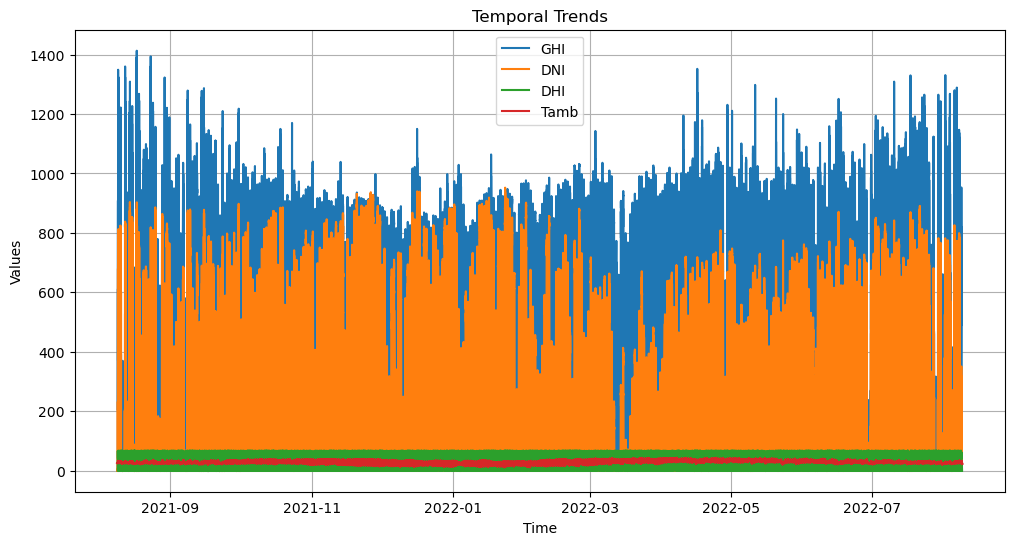

In [29]:
# Plotting temporal trends
plt.figure(figsize=(12, 6))
for column in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(benin_malanville_df.index, benin_malanville_df[column], label=column)
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Temporal Trends')
plt.legend()
plt.grid()
plt.show()


<Figure size 1200x600 with 0 Axes>

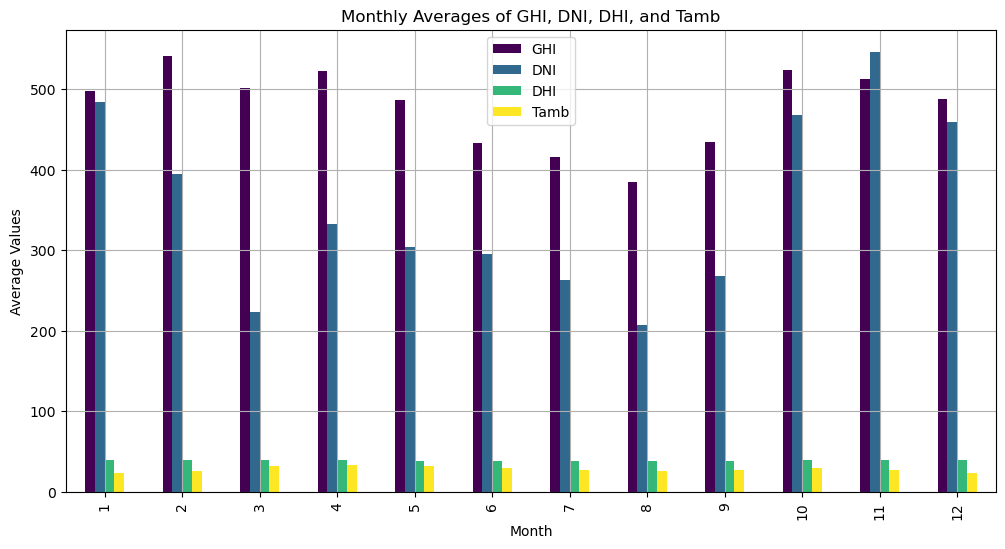

In [30]:
# Monthly Aggregations
benin_malanville_df['Month'] = benin_malanville_df.index.month
monthly_avg = benin_malanville_df.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Monthly trends
plt.figure(figsize=(12, 6))
monthly_avg.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.xlabel('Month')
plt.ylabel('Average Values')
plt.title('Monthly Averages of GHI, DNI, DHI, and Tamb')
plt.legend()
plt.grid()
plt.show()


In [ ]:

# Hourly Aggregation for Diurnal Patterns
benin_malanville_df['Hour'] = benin_malanville_df.index.hour
hourly_avg = benin_malanville_df.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Plot hourly trends
plt.figure(figsize=(12, 6))
hourly_avg.plot(kind='line', marker='o', figsize=(12, 6), colormap='plasma')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Values')
plt.title('Diurnal Patterns of GHI, DNI, DHI, and Tamb')
plt.legend()
plt.grid()
plt.show()
